# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import pandas as pd

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def dice_roll():
    # define list of possible outcomes
    dice = [1, 2, 3, 4, 5, 6]
    # randomly choose between possible outcomes, do that 10 time (k argument)
    # random.choices returns a list
    r = random.choices(dice, k=10)
    # save it in a dataframe
    r = pd.DataFrame(r)
    return r


In [3]:
r = dice_roll()

#### 2.- Plot the results sorted by value.

In [4]:
# change the name of the column
# I don't want a column name to be the same as an index value
r.rename({0 : "result"}, axis=1, inplace=True)
r

,result
0,5
1,4
2,1
3,2
4,4
5,3
6,3
7,2
8,5
9,6


In [5]:
# sort the values in 'result' column
r.sort_values(by='result', ascending=True, inplace=True)

In [6]:
r

,result
2,1
3,2
7,2
5,3
6,3
1,4
4,4
0,5
8,5
9,6


In [7]:
# I want the index to match the sorted values
r.reset_index(inplace=True)
r

,index,result
0,2,1
1,3,2
2,7,2
3,5,3
4,6,3
5,1,4
6,4,4
7,0,5
8,8,5
9,9,6


In [8]:
# I want the old index to be dropped
r.drop('index', axis=1, inplace=True)
r

,result
0,1
1,2
2,2
3,3
4,3
5,4
6,4
7,5
8,5
9,6


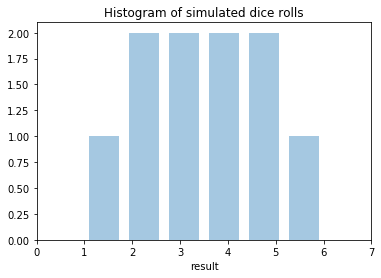

In [9]:
# plot the results

# xticks are not aligned with bars

x = r['result']

sns.distplot(x, kde=False, hist_kws={"rwidth":0.75}, bins=6)
plt.title("Histogram of simulated dice rolls")
plt.xlim([0,7])
plt.show()

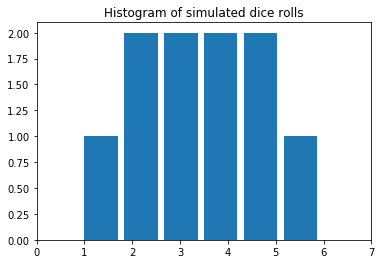

In [10]:
# xticks are not aligned with bars

x = r['result']

plt.hist(x, bins=6, width=0.7)
plt.title("Histogram of simulated dice rolls")
plt.xlim([0,7])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

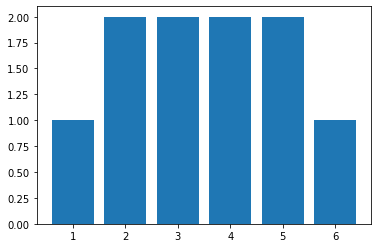

In [11]:
# your code here

freq = r['result'].value_counts()

plt.bar(freq.index, freq.values)
plt.show()

In [17]:
"""
The two plots show the same information: number of occurrences of each side of the dice. 
"""

'\nThe two plots show the same information: number of occurrences of each side of the dice. \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# your code here

def mean_func(x):
    x = sum(x)/len(x)
    return x

In [13]:
mean_func(r['result'])

3.5

In [14]:
# check the mean is correct
np.mean(r['result'])

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [20]:
# your code here
# value_counts()

def freq_func(x):
    result_dict = {}
    for result in x:
        if result not in result_dict.keys():
            # add result of dice roll as key and assign value 1
            result_dict[result] = 1
        else:
            # if a result of dice roll occurs once more, increment value in dict by 1
            result_dict[result] += 1            
    return result_dict

result_dict = freq_func(r['result'])


In [21]:
result_dict

{1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 1}

In [22]:

mean_func(result_dict.values())


1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [26]:
# your code here

def median_func(lst):
    sortedLst = sorted(list(lst))
    lstLen = len(lst)

    if (lstLen % 2) == 0:
        index1 = int(lstLen / 2)
        index2 = int((lstLen / 2) - 1)
        return (sortedLst[index1] + sortedLst[index2]) / 2, [index1, index2]
    else:
        index1 = int(lstLen / 2)
        return sortedLst[index1], [index1]

In [27]:
median_func(r['result'])

(3.5, [5, 4])

In [29]:
np.median(r['result'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [32]:
# your code here

num_list = [28, 12, 8, 27, 16, 31, 14, 13, 19, 1, 1, 22, 13]

med, median_indices = median_func(num_list)

Q2, Q1_indices = median_func(num_list[:median_indices[0]])
Q1, Q2_indices = median_func(num_list[median_indices[-1] + 1:])

quartiles = [Q1, med, Q2]

print("(Q1, median, Q3): {}".format(quartiles))

(Q1, median, Q3): [13.0, 14, 21.5]


In [33]:
num_list = [28, 12, 8, 27, 16, 31, 14, 13, 19, 1, 1, 22, 13]

def quantiles_func(x):
    med, median_indices = median_func(x)
    Q2, Q1_indices = median_func(x[:median_indices[0]])
    Q1, Q2_indices = median_func(x[median_indices[-1] + 1:])
    quartiles = [Q1, med, Q2]
    return "(Q1, median, Q3): {}".format(quartiles)

In [34]:
quartiles = quantiles_func(num_list)
quartiles

'(Q1, median, Q3): [13.0, 14, 21.5]'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [35]:
# your code here

roll_hundred = pd.read_csv('/Users/celinaagostinho/Desktop/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')


In [36]:
roll_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [52]:
roll_hundred.drop('Unnamed: 0', axis=1, inplace=True)

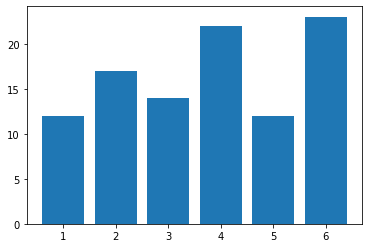

In [96]:

roll_hundred = roll_hundred.sort_values(by='value')
roll_hundred_hist = roll_hundred.groupby('value')['value'].count()

x = roll_hundred_hist.index
y = roll_hundred_hist.values

plt.bar(x,y)

plt.show()


In [ ]:
"""
the most frequent values are 4 and 6
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [57]:
# your code here

mean_func(roll_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [76]:
frequencies = freq_func(roll_hundred['value'])
frequencies

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

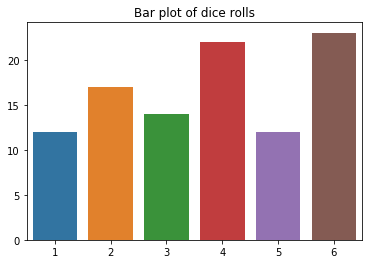

In [86]:
# your code here
# histogram of what?

x = list(frequencies.keys())
y = list(frequencies.values())

sns.barplot(x, y)
plt.title("Bar plot of dice rolls")
#plt.xlim([0,7])
plt.show()

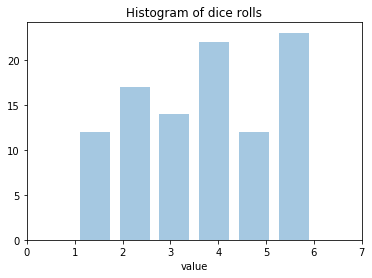

In [87]:
# xticks are not aligned with bars

x = roll_hundred['value']

sns.distplot(x, kde=False, hist_kws={"rwidth":0.75}, bins=6)
plt.title("Histogram of dice rolls")
plt.xlim([0,7])
plt.show()

In [ ]:
"""
Mean is close to 4, most frequent values are 4 and 6
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [98]:
# your code here

roll_thousand = pd.read_csv('/Users/celinaagostinho/Desktop/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')

roll_thousand.drop('Unnamed: 0', axis=1, inplace=True)

roll_thousand.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


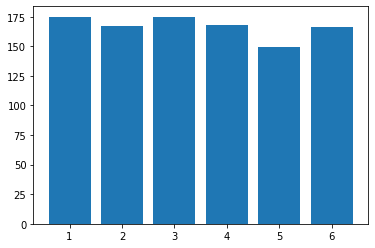

In [99]:
roll_thousand = roll_thousand.sort_values(by='value')
roll_thousand_hist = roll_thousand.groupby('value')['value'].count()

x = roll_thousand_hist.index
y = roll_thousand_hist.values

plt.bar(x,y)

plt.show()

In [ ]:
"""

frequencies are balanced between the different possible values

Roughly same frequency for each value with increase in dice rolls (larger sample of dice rolls)

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [102]:
# your code here

ages = pd.read_csv('/Users/celinaagostinho/Desktop/lab-understanding-descriptive-stats/data/ages_population.csv')
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [103]:
frequencies = freq_func(ages['observation'])
frequencies

{68.0: 3,
 12.0: 11,
 45.0: 29,
 38.0: 30,
 49.0: 19,
 27.0: 25,
 39.0: 45,
 42.0: 32,
 33.0: 22,
 30.0: 34,
 25.0: 19,
 44.0: 23,
 53.0: 12,
 46.0: 23,
 50.0: 16,
 22.0: 16,
 6.0: 2,
 29.0: 26,
 35.0: 33,
 28.0: 20,
 26.0: 23,
 60.0: 4,
 41.0: 36,
 52.0: 14,
 32.0: 30,
 23.0: 17,
 15.0: 8,
 40.0: 27,
 63.0: 7,
 31.0: 24,
 34.0: 29,
 61.0: 2,
 64.0: 2,
 37.0: 30,
 56.0: 15,
 14.0: 10,
 13.0: 6,
 51.0: 9,
 36.0: 31,
 18.0: 7,
 48.0: 19,
 58.0: 7,
 20.0: 13,
 54.0: 13,
 19.0: 11,
 62.0: 4,
 55.0: 13,
 21.0: 14,
 43.0: 32,
 17.0: 10,
 7.0: 1,
 47.0: 17,
 1.0: 2,
 16.0: 8,
 24.0: 18,
 59.0: 8,
 57.0: 7,
 8.0: 5,
 67.0: 4,
 2.0: 2,
 66.0: 3,
 4.0: 1,
 73.0: 1,
 82.0: 1,
 70.0: 1,
 5.0: 2,
 71.0: 1,
 9.0: 2,
 69.0: 1,
 11.0: 3,
 10.0: 3,
 65.0: 2}

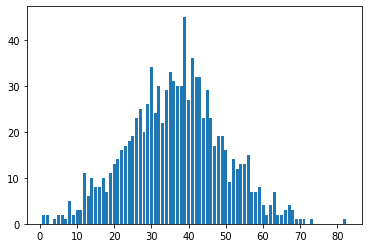

In [104]:
ages_plot = ages.sort_values(by='observation')
ages_plot = ages_plot.groupby('observation')['observation'].count()

x = ages_plot.index
y = ages_plot.values

plt.bar(x,y)

plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [105]:
# your code here

print('The mean is', np.mean(ages['observation']))
print('The standard deviation is', np.std(ages['observation']))

The mean is 36.56
The standard deviation is 12.81008977329979


In [ ]:
"""
They are consistent with the ranges shown in the plot
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [106]:
# your code here

ages2 = pd.read_csv('/Users/celinaagostinho/Desktop/lab-understanding-descriptive-stats/data/ages_population2.csv')
ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


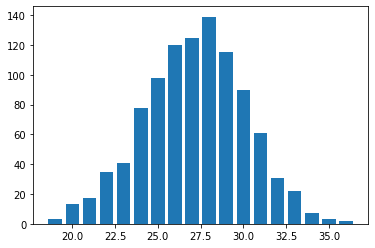

In [108]:
frequencies = freq_func(ages2['observation'])

ages2_plot = ages2.sort_values(by='observation')
ages2_plot = ages2_plot.groupby('observation')['observation'].count()

x = ages2_plot.index
y = ages2_plot.values

plt.bar(x,y)

plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The ages are in intervals
The mean is around 28, rather than 37.
The standard deviation is not wide.

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [109]:
# your code here

print('The mean is', np.mean(ages2['observation']))
print('The standard deviation is', np.std(ages2['observation']))

The mean is 27.155
The standard deviation is 2.9683286543103704


In [ ]:
"""
The mean and standard deviation are consistent with what was observed before.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [110]:
# your code here

ages3 = pd.read_csv('/Users/celinaagostinho/Desktop/lab-understanding-descriptive-stats/data/ages_population3.csv')
ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


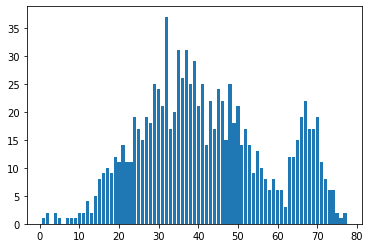

In [111]:
frequencies = freq_func(ages3['observation'])

ages3_plot = ages3.sort_values(by='observation')
ages3_plot = ages3_plot.groupby('observation')['observation'].count()

x = ages3_plot.index
y = ages3_plot.values

plt.bar(x,y)

plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [113]:
# your code here

print('The mean is', np.mean(ages3['observation']))
print('The standard deviation is', np.std(ages3['observation']))

The mean is 41.989
The standard deviation is 16.136631587788084


In [ ]:
"""
There's a wider range of values, and a bimodal distribution, which inflates the mean.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [120]:
# your code here

#ages3.quantile()

q1 = ages3['observation'].quantile(q=0.25)
median = ages3['observation'].quantile(q=0.5)
q3 = ages3['observation'].quantile(q=0.75)
mean = ages3['observation'].mean()

print('The lower quartile boundary is', q1)
print('The median is', median)
print('The upper quartile boundary is', q3)
print('The mean is', mean)

The lower quartile boundary is 30.0
The median is 40.0
The upper quartile boundary is 53.0
The mean is 41.989


In [ ]:
"""
There's a difference of less than one years between the mean and the median.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [123]:
# your code here

q7 = ages3['observation'].quantile(q=0.7)
q8 = ages3['observation'].quantile(q=0.8)
q9 = ages3['observation'].quantile(q=0.9)

print('Percentile 70 is', q7)
print('Percentile 80 is', q8)
print('Percentile 90 is', q9)

Percentile 70 is 50.0
Percentile 80 is 57.0
Percentile 90 is 67.0


In [ ]:
"""
10% of the sample is between 57 and 67 years old.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""